# Introducción a Filtros Digitales
- [Introducción](#introducción)
- [Aplicaciones de filtros digitales](#aplicaciones-de-filtros-digitales)
- [Tipos de filtros digitales](#tipos-de-filtros-digitales)
- [Diseño de filtros digitales](#diseño-de-filtros-digitales)
- [Implementación de filtros digitales en Python](#implementación-de-filtros-digitales-en-python)

## Introducción

En ingeniería electrónica, un filtro es un sistema que permite manipular el contenido en frecuencia de una señal de acuerdo a los requerimientos establecidos. Por ejemplo, un filtro puede ser utilizado para amplificar o atenuar un rango de frecuencias, o bien para eliminar o aislar un componente en frecuencia específico.

Los filtros se suelen componer de varios elementos, entre los que destacan:
- Magnitud:
    - Valor que representa la ganancia del componente en frecuencia.
    - Usualmente denotado en $dB$.
    - Cuando es 0 se busca mantener intacto el componente en frecuencia.
    - Cuando es menor a 0 se busca atenuar el componente en frecuencia.
    - Cuando es mayor a 1 se busca amplificar el componente en frecuencia.
    - Usualmente se denota como $H_\omega$.
- Banda de paso:
    - Rango de frecuencias que se busca mantener o amplificar.
- Banda de rechazo:
    - Rango de frecuencias que se busca atenuar.
- Frecuencia de corte:
    - Valor o valores en los que se presenta un cambio entre banda de paso y rechazo.
    - Este valor está determinado por la frecuencia en la que se consigue una magnitud de $-3 db$.
    - Usualmente se denota como $\omega_{c}$.


Caracteristicas
-  Alta inmunidad al ruido 
-  Alta precisión, limitada por los errores de redondeo en la aritmética empleada 
-  Fácil modificación de las características del filtro
-   Muy bajo costo

## Aplicaciones de filtros digitales

- Procesamiento de audio: Los filtros digitales se utilizan en aplicaciones de procesamiento de audio, como la mejora de la calidad de sonido, la eliminación de ruido y la ecualización.
- Comunicaciones: Los filtros digitales son esenciales en la transmisión de datos y señales de voz en sistemas de comunicaciones.
- Imágenes: Se utilizan filtros digitales en aplicaciones de procesamiento de imágenes para mejorar la claridad, reducir el ruido y realizar operaciones como la detección de bordes.
- Análisis de señales: Los filtros digitales se utilizan en aplicaciones de análisis de señales para extraer información útil de una señal y para reducir el ruido y la interferencia.
- Control de sistemas: Los filtros digitales se utilizan en sistemas de control para modelar y controlar la dinámica de sistemas reales.
- Procesamiento de señales médicas: Los filtros digitales se utilizan en aplicaciones médicas para procesar y analizar señales médicas, como electrocardiogramas.

## Tipos de filtros digitales

### Clasificación según bandas de paso
La principal clasificación de los filtros digitales se basa en los intervalos de su banda de paso, en la cual existen 4 filtros principales.

Este sistema de clasificación aplica igual para los filtros analógicos.

#### Filtro pasa bajas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo [0, $\omega_{c}$).
- Su banda de rechazo es el intervalo [$\omega_{c}$, $\infty$).

<img src="./figures/pasa_baja.png" width="400">

#### Filtro pasa altas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo ($\omega_{c}$, $\infty$).
- Su banda de rechazo es el intervalo [0, $\omega_{c}$].

<img src="./figures/pasa_alta.png" width="400">

#### Filtro pasa banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Su banda de paso es el intervalo ($\omega_{c1}$, $\omega_{c2}$).
- Sus bandas de rechazo son los intervalos [0, $\omega_{c1}$] y [$\omega_{c2}$, $\infty$).

<img src="./figures/pasa_banda.png" width="400">

#### Filtro rechaza banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Sus bandas de paso son los intervalos [0, $\omega_{c1}$) y ($\omega_{c2}$, $\infty$).
- Su banda de rechazo es el intervalo [$\omega_{c1}$, $\omega_{c2}$].

<img src="./figures/rechaza_banda.png" width="400">

>Observación: Las figuras mostradas anteriormente muestran la respuesta en frecuencia de filtros ideales, sin embargo, más adelante observaremos que los filtros reales presentan ligeros cambios respecto a los ideales.

### Clasificación según tipo de respuesta al impulso


#### Respuesta al impulso infinita (IIR)
Los filtros de respuesta al impulso infinita (también llamados recursivos) suelen conseguir implementaciones con orden de filtro mucho menor, sin embargo presentan una fase no lineal.

Tiene como función de transferencia:

$H(z) = \frac{b(1) + b(2)z^{-1} + ... + b(m+1)z^{-M}}{1+ a(2)z^{-1} + ... + a(n+1)z^{-N}} $

Caracteristicas
-	Es recursivo, o sea, que su salida además de las entradas depende de las salidas pasadas. 
-	Tiene polos y ceros, tiene problemas de estabilidad. 
-	La fase no es lineal con la frecuencia 
-	El orden del filtro es mucho menor que un filtro FIR para la misma aplicación


#### Respuesta al impulso finita (FIR)
Los filtros de respuesta al impulso finita (también llamados no recursivos)

Tiene como función de transferencia:

$H(z) = b(1) + b(2) z^{-1} + ⋯ + b(m+1)z^{-M}$

Caracteristicas: 

- La secuencia b(k) son los coeficientes del filtro 
- Es no recursivo, o sea, la salida depende solamente de las entradas y no de las salidas pasadas 
- La función de transferencia sólo tiene ceros, excelente estabilidad.
- Suelen requerir un orden de filtro mucho más alto que los filtros IIR para alcanzar un determinado nivel de rendimiento


## Diseño de filtros digitales

En general, el filtro está diseñado prinicpalmente en base a especificaciones de la banda de paso, la banda de rechazo y la banda de transición de la respuesta de frecuencia del filtro. 

- Banda de paso del filtro es el rango de frecuencias en la que un filtro permite el paso de la señal sin atenuación significativa. 
- Banda de rechazo del filtro se define como el rango de frecuencia sobre el cual se atenúa la respuesta de magnitud del filtro para eliminar la señal de entrada cuyos componentes de frecuencia están dentro de ese rango. 
- Banda de transición denota el rango de frecuencia entre la banda de paso y la banda de rechazo. 

<img src="./figures/c_Filtro.png" width="400">

Donde:

- La frecuencia de corte ωp define el límite superior de la banda de paso.
- La frecuencia de corte ωs designa el comienzo de la banda eliminada. 
- Por tanto, la anchura de la banda de transición es ωs − ωp. 
- Si existe rizado en la banda de paso del filtro, su valor se designa mediante δ1.
- El módulo |H(ω)|,respuesta de amplitud, varía entre los límites 1±δ1. 
- El rizado de la banda eliminada del filtro se designa como δ2.

Para acomodar un rango dinámico grande en la gráfica de la respuesta en frecuencia de cualquier filtro, es habitual utilizar una escala logarítmica para el módulo |H(ω)|. En consecuencia, el rizado en la banda de paso es 20log10 δ1, y en la banda de rechazo es 20log10 δ2.

En cualquier problema de diseño de filtros podemos especificar: 
- el rizado máximo de la banda de paso tolerable
- el rizado máximo de la banda eliminada tolerable 
- la frecuencia de corte de la banda de paso ωp 
- la frecuencia de corte de la banda eliminada ωs. 

Basándonos en estas especificaciones, podemos seleccionar los parámetros {ak} y {bk} de la respuesta en frecuencia, que proporcionen la mejor aproximación a la especificación deseada. El grado en que H(ω) se aproxime a la especificación depende en parte de los criterios utilizados para seleccionar los coeficientes del filtro {ak} y {bk}, así como de las cantidades (M,N) de coeficientes.

### Diseño de filtros IIR

$H(z) =\frac{B(z)}{A(z)} = \frac{b(1)+b(2)z^{-1} + ... + b(n+1)z^{-n}}{1 + a(2)z^{-1} + ... + a(n+1)z^{-n}} $

Filtro Butterworth

Caracteristicas:

- La respuesta de amplitud disminuye suavemente desde la banda de paso hasta la banda de parada, es decir, se obtiene una atenuación gradual. 
- No presenta picos en la respuesta de amplitud
- El filtro tiene una ganancia constante en la banda de paso, pero no necesariamente es plana en toda la banda de paso.


<img src="./figures/Filtro_Butterworth.png" width="400">

Filtro Chebyshev Tipo I

Caracteristicas:
- Minimiza la diferencia entre el ideal y la respuesta de frecuencia actual sobre la banda de paso incorporando un equiriple de Rp dB (picos) en la banda de paso. Cuanto mayor sea el valor de Rp, más pronunciados serán los picos en la respuesta de amplitud.
- La transición de la banda de paso a la banda de rechazo es más rápida que en el de Butterworth.
- La respuesta en la banda rechazo es plana (maximally flat). 

<img src="./figures/Filtro_Chebyshev.png" width="400">

Filtro Chebyshev Tipo II

Caracteristicas:
- Minimiza la diferencia con el filtro ideal en la banda de rechazo incorporando un equiriple de Rs dB (picos) en la banda de rechazo. 
- La transición de la banda de paso a la banda de rechazo es más rápida que en el de Butterworth.
- La respuesta en la banda de paso es plana (Maximally flat).     

<img src="./figures/Filtro_Chebyshev_II.png" width="400">

Filtro Elíptico 

Caracteristicas:
- Atenuación equirriple tanto en banda de paso como en banda de rechazo, es decir, presenta picos en ambas bandas: Riple en la banda de paso (Rp) y Riple en la banda de rechazo (Rs). 
- Tiene la capacidad de lograr una transición más pronunciada y rápida entre la banda de paso y la banda de parada, es decir, minimiza el ancho de la transición.


<img src="./figures/Filtro_Eliptico.png" width="400">

### Diseño de filtros FIR

| Método de diseño de filtro | Descripción | 
| --- | --- | 
| Ventanas |  Uno de los métodos de diseño de filtros FIR más simples y fáciles de implementar. Tienden a tener una respuesta en frecuencia limitada por la forma de la ventana utilizada. Tipos de ventanas: Rectangular, Barlett, Hann, Hamming, Blackman, Kaiser,etc. |
| Multibanda con bandas de transición | Método de equiripple o de mínimos cuadrados en las sub-bandas del intervalo de frecuencias. | 
| Mínimos cuadrados restringidos | Minimizar la integral del cuadrado del error en todo el intervalo de frecuencias con restricciones de error máximo. La restricción consiste en que no es necesario definir las bandas de transición.|
| Respuesta arbitraria | Permite diseñar filtro con una respuesta de frecuencia completamente personalizada y arbitraria., incluidos los filtros complejos y de fase no lineal.|
| Coseno alzado | Variante de los filtros FIR con ventana que utiliza una función de coseno alzado para suavizar los bordes de la ventana rectangular.|

Los coeficientes o "taps" del filtro obedecen a una relación de simetría par o impar. En función de esta simetría y de si el orden n del filtro es par o impar, un filtro de fase lineal (almacenado en la longitud n+1 del vector b) tiene ciertas restricciones inherentes a su respuesta en frecuencia.

|Tipos de filtros de fase lineal|Orden del filtro|Respuesta H(f), f=0| Respuesta H(f), f= 1 (Nyquist)|
|---|---|---|---|
|Tipo I|Par|Sin restricción| Sin restricción|
| Tipo II|Impar| Sin restricción| H(1)=0|
| Tipo III| Par| H(0)=0|H(1)=0|
|Tipo IV| Impar| H(0)=0|Sin restricción|

https://la.mathworks.com/help/signal/ug/fir-filter-design.html

## Implementación del diseño de filtros en Python

A continuación, se muestran ejemplos de la implementación del diseño de filtros IIR y FIR en Python. Primeramente, es necesario definir las librerias con las cuales se trabajará.

In [1]:
## Librerías
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


#### Filtros IIR

##### Filtro Pasa Bajas

El siguiente código implementa el diseño de un filtro Butterworth digital de cuarto orden (N=4) con frecuencia de corte de 100 Hz, en donde se graficará la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqz". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Butterworth.

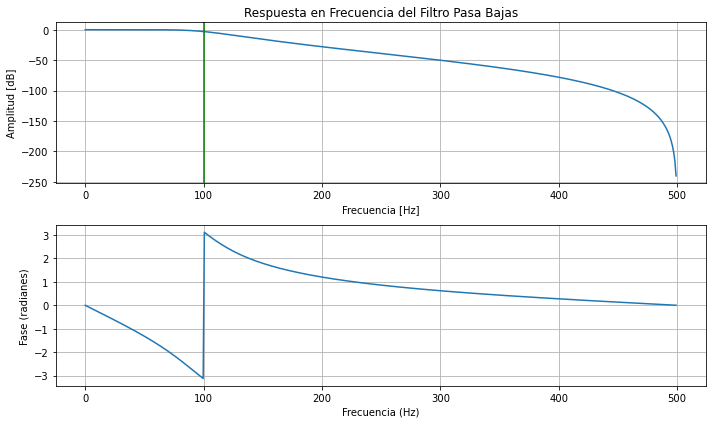

In [39]:
## Filtro Butterworth

frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo),
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)
"""
NOTA: fracción de la frecuencia de Nyquist, que es la mitad de la frecuencia de muestreo del sistema.
La frecuencia de Nyquist (f_Nyquist) es igual a la mitad de la frecuencia de muestreo (f_muestreo/2). 
Entonces, para especificar la frecuencia de corte normalizada (Wn), debes dividir la frecuencia de 
corte deseada por la frecuencia de Nyquist.
"""
# Diseñar el filtro pasa bajas utilizando la función iirfilter
b, a = signal.iirfilter(N=orden, Wn=frec_corte_normalizada,analog=False, btype='low', ftype='butter')
""" 
Donde:
N: Orden del filtro
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).

analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""
# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Pasa Bajas')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(100, color='green') #Línea vertical para marcar la frecuencia de corte
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código implementa el diseño de un filtro Chebyshev Tipo I de cuarto orden (N=4) con frecuencia de corte de 100 Hz y una atenuación de 5 dB en la banda de paso (rp=5), en donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo I.

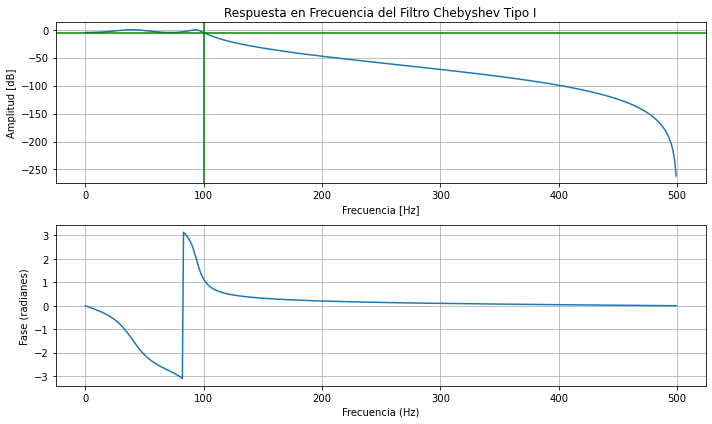

In [40]:
## Filtro Chebyshev Tipo I


# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_db = 5 # Atenuación en dB en la banda de paso
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo I utilizando la función cheby1
b, a = signal.cheby1(N=orden, rp=ripple_db, Wn=frec_corte_normalizada, btype='low', analog=False)
#b, a = signal.iirfilter(N=orden, Wn=frec_corte_normalizada,rp = ripple_db,btype='low', analog=False, ftype='cheby1')

""" 
Donde:
N: Orden del filtro
rp: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda de paso. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo I')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid()
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-5, color='green') # Línea horizontal para marcar la atenuación en la banda de paso


plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo II de cuarto orden (N=4) con frecuencia de corte de 100 Hz y una atenuación de 40 dB en la banda de rechazo (rs=40). Luego, grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II.

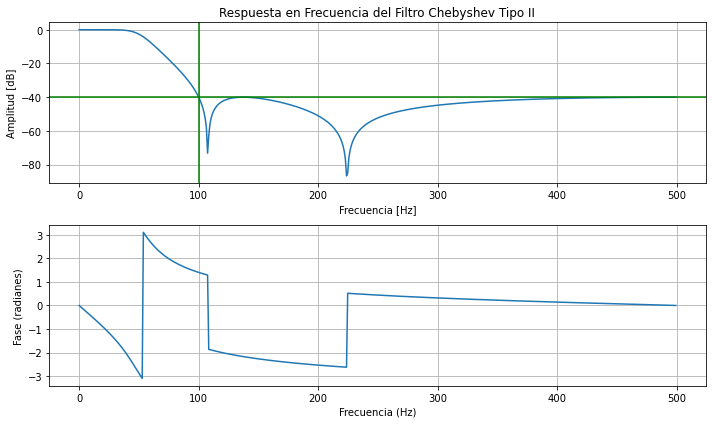

In [41]:
## Filtro Chebyshev Tipo II

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_db = 40  # Atenuación en dB en la banda de detención
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo)
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo II utilizando la función cheby2
b, a = signal.cheby2(N=orden, rs=ripple_db, Wn=frec_corte_normalizada, btype='low', analog=False)
#b, a = signal.iirfilter(N=orden, Wn=frec_corte_normalizada,rs = ripple_db,btype='low', analog=False, ftype='cheby2')

""" 
Donde:
N: Orden del filtro
rs: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda rechazo. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo II')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # Línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código que proporcionas implementa el diseño de un filtro elíptico de cuarto orden (N=4) con frecuencia de corte de 100Hz, una atenuación de 5 dB en la banda de paso (rp=5) y una atenuación de 40 dB en la banda de rechazo (rs=40). Luego, grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro elíptico.

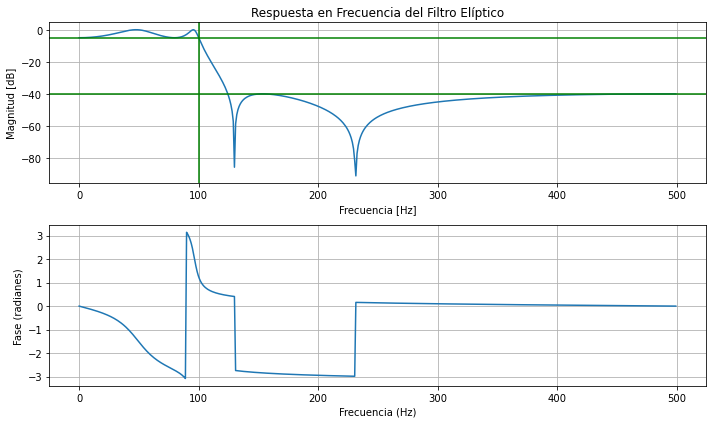

In [42]:
## Filtro Elliptico

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_pass_db = 5  # Atenuación en dB en la banda de paso
ripple_stop_db = 40  # Atenuación en dB en la banda de rechazo
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo)
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas elíptico utilizando la función ellip
b, a = signal.ellip(N=orden, rp=ripple_pass_db, rs=ripple_stop_db, Wn=frec_corte_normalizada, btype='low', analog=False)
#b, a = signal.iirfilter(N=orden, rp=ripple_pass_db, rs=ripple_stop_db, Wn=frec_corte_normalizada, btype='low', analog=False, ftype='ellip')

""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la máxima ondulación en la banda pasante. (dB)
rs: Para los filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de paso. (dB)
bytpe: El tipo de filtro, paso banda, paso bajo, paso alto, banda de parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Elíptico')
plt.ylabel('Magnitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid()
plt.axvline(100, color='green') # línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.axhline(-5, color='green') # línea horizontal para marcar la atenuación en la banda de paso (rp)

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

##### Filtro Pasa Altas

El código implementa el diseño de un filtro Butterworth de cuarto orden (N=4) con frecuencia de corte de 100 Hz y tipo de filtro pasa-altos (btype='high'), en donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Butterworth pasa-altos.

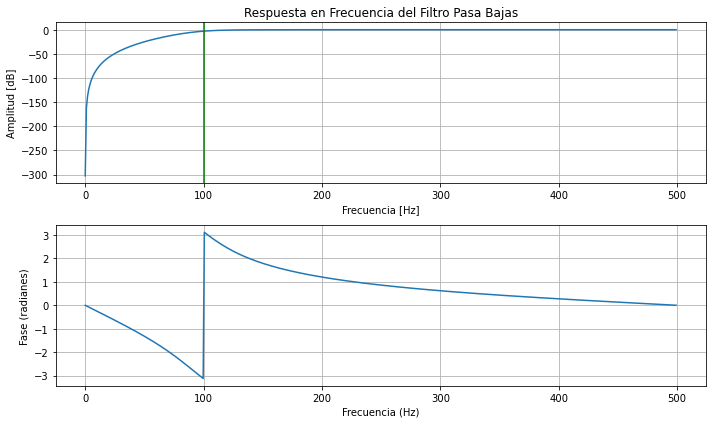

In [43]:
## Filtro Butterworth

frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas utilizando la función iirfilter
b, a = signal.iirfilter(N=orden, Wn=frec_corte_normalizada,analog=False, btype='high', ftype='butter')
""" 
Donde:
N: Orden del filtro
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.
ftype: El tipo de filtro IIR a diseñar,Butterworth(butter),Chebyshev I (cheby1),Chebyshev II (cheby2),
Elíptico(ellip).

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""
# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Pasa Bajas')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(100, color='green') #Línea vertical para marcar la frecuencia de corte
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo I de cuarto orden (N=4) con frecuencia de corte de 100 Hz, una atenuación de 5 dB en la banda de paso (rp=5) y tipo de filtro pasa-altos (btype='high'), donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo I pasa-altos.


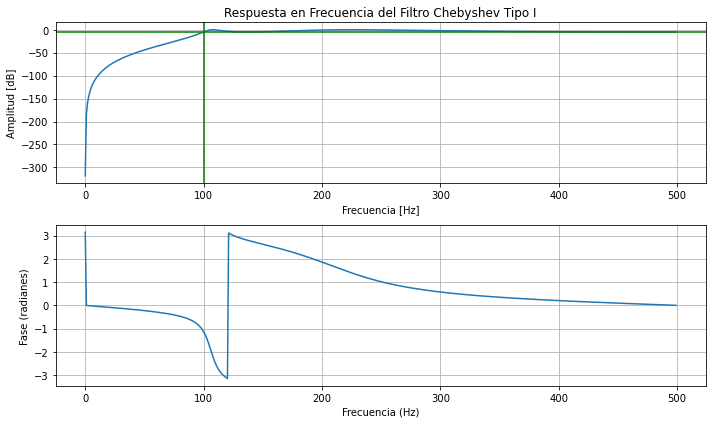

In [44]:
## Filtro Chebyshev Tipo I


# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_db = 5 # Atenuación en dB en la banda de paso
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo I utilizando la función cheby1
b, a = signal.iirfilter(N=4, Wn=frec_corte_normalizada,rp = ripple_db,btype='high', analog=False, ftype='cheby1')
#b, a = signal.cheby1(N=orden, rp=ripple_db, Wn=frec_corte_normalizada, btype='high', analog=False)

""" 
Donde:
N: Orden del filtro
rp: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda de paso. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo I')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid()
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-5, color='green') # Línea horizontal para marcar la atenuación en la banda de paso

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código que proporcionas implementa el diseño de un filtro Chebyshev Tipo II de cuarto orden (N=4) con frecuencia de corte de 100 Hz, una atenuación de 40 dB en la banda de paso (rs=40) y tipo de filtro pasa-altos (btype='high'), donde se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II pasa-altos.

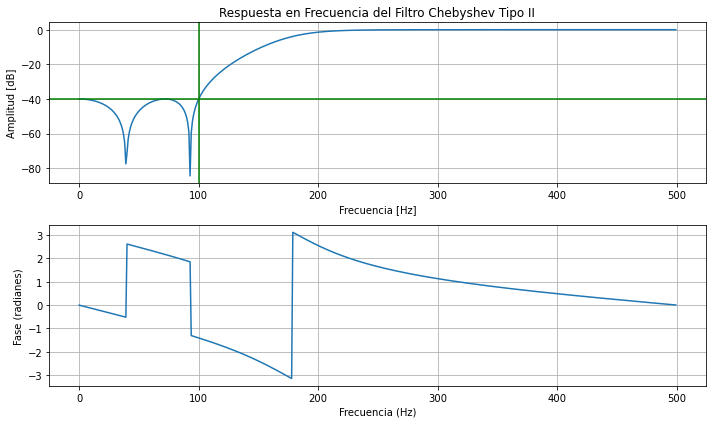

In [45]:
## Filtro Chebyshev Tipo II

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_db = 40  # Atenuación en dB en la banda de detención
frec_muestreo = 1000   # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo II utilizando la función cheby2
b, a = signal.cheby2(N=orden, rs=ripple_db, Wn=frec_corte_normalizada, btype='high', analog=False)
#b, a = signal.iirfilter(N=orden, Wn=frec_corte_normalizada,rs = ripple_db,btype='high', analog=False, ftype='cheby2')

""" 
Donde:
N: Orden del filtro
rs: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda rechazo. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo II')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(100, color='green') # Línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # Línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

El código implementa el diseño de un filtro elíptico analógico de cuarto orden (N=4) con frecuencia de corte de 100 radianes por segundo (Wn=100), una atenuación de 5 dB en la banda de paso (rp=5) y una atenuación de 40 dB en la banda de rechazo (rs=40), además de ser un filtro pasa-altos (btype='high'). Posteriormente, se grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal", la función "signal.freqs" y la libreria "matplotlib". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro elíptico.

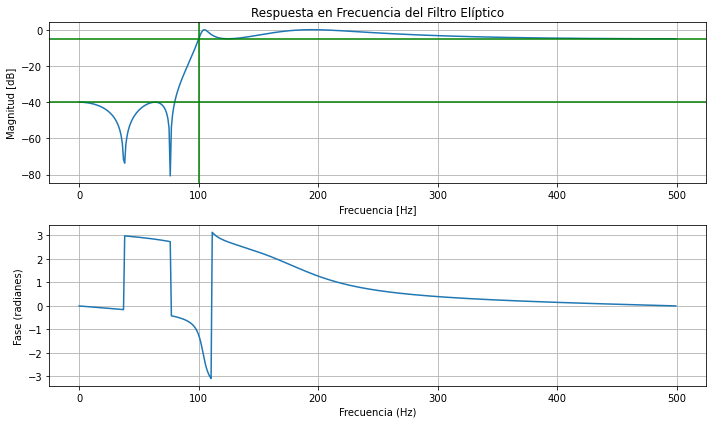

In [46]:
## Filtro Elliptico

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro
ripple_pass_db = 5  # Atenuación en dB en la banda de paso
ripple_stop_db = 40  # Atenuación en dB en la banda de rechazo
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas elíptico utilizando la función ellip
b, a = signal.ellip(N=orden, rp=ripple_pass_db, rs=ripple_stop_db, Wn=frec_corte_normalizada, btype='high', analog=False)
#b, a = signal.iirfilter(N=orden, rp=ripple_pass_db, rs=ripple_stop_db, Wn=frec_corte_normalizada, btype='high', analog=False, ftype='ellip')

""" 
Donde:
N: El orden del filtro.
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
rp: Para filtros Chebyshev y elípticos, proporciona la máxima ondulación en la banda pasante. (dB)
rs: Para los filtros Chebyshev y elípticos, proporciona la atenuación mínima en la banda de paso. (dB)
bytpe: El tipo de filtro, paso banda, paso bajo, paso alto, banda de parada.
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.

b,a: Polinomios del numerador (b) y denominador (a) del filtro IIR.
"""
# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos


# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Elíptico')
plt.ylabel('Magnitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid()
plt.axvline(100, color='green') # línea vertical para marcar la frecuencia de corte
plt.axhline(-40, color='green') # línea horizontal para marcar la atenuación en la banda de rechazo (rs)
plt.axhline(-5, color='green') # línea horizontal para marcar la atenuación en la banda de paso (rp)

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

##### Filtro Pasa Bandas

El código implementa el diseño de un filtro Chebyshev Tipo II de orden 4 (N=4) con frecuencia de corte en un rango de 50 Hz a 200 Hz, una atenuación de 20 dB en la banda de rechazo (rs=20) y tipo de filtro pasa-banda (btype='band'). Luego, calcula y grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II pasa-banda.

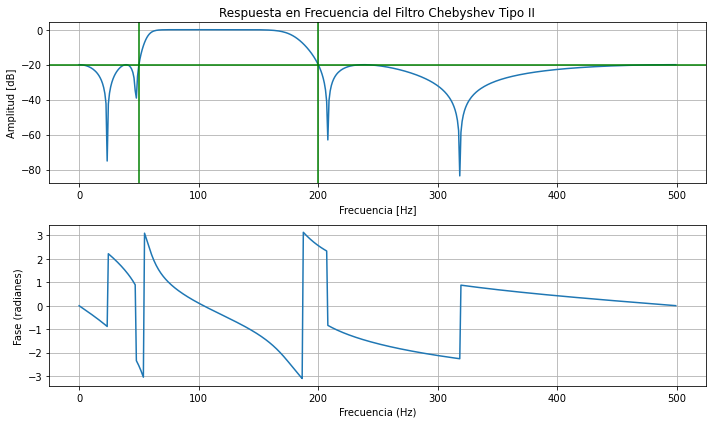

In [47]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 4.

# Especificaciones del filtro
frec_corte_baja = 50  # Frecuencia de corte inferior en Hz
frec_corte_alta = 200  # Frecuencia de corte superior en Hz
orden = 4 # Orden del filtro
ripple_db = 20  # Atenuación en dB en la banda de detención
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular las frecuencias de corte normalizadas (entre 0 y 1)
frec_corte_baja_normalizada = frec_corte_baja / (0.5 * frec_muestreo)
frec_corte_alta_normalizada = frec_corte_alta / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo II utilizando la función cheby2
#b, a = signal.cheby2(N=orden, rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada], btype='band', analog=False)
b, a = signal.iirfilter(N=orden,rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada],btype='band', analog=False, ftype='cheby2')

""" 
Donde:
N: Orden del filtro
rs: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda rechazo. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo II')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(50, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
# de corte inferior del filtro
plt.axvline(200, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte superior del filtro
plt.axhline(-20, color='green') # Agrega una línea horizontal verde en el gráfico para marcar la atenuación 
#en la banda de rechazo (rs)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

##### Filtro Rechaza bandas

El código implementa el diseño de un filtro Chebyshev Tipo II analógico de orden 17 (N=17) con frecuencia de corte en un rango de 50 Hz a 200 Hz (Wn=[2np.pi50, 2np.pi200]), una atenuación de 60 dB en la banda de rechazo (rs=60) y tipo de filtro rechaza bandas (btype='stop'). Luego, calcula y grafica la respuesta en frecuencia del filtro utilizando la librería de Python "scipy.signal" y la función "signal.freqs". Finalmente, muestra el gráfico de la respuesta de frecuencia del filtro Chebyshev Tipo II rechaza bandas.

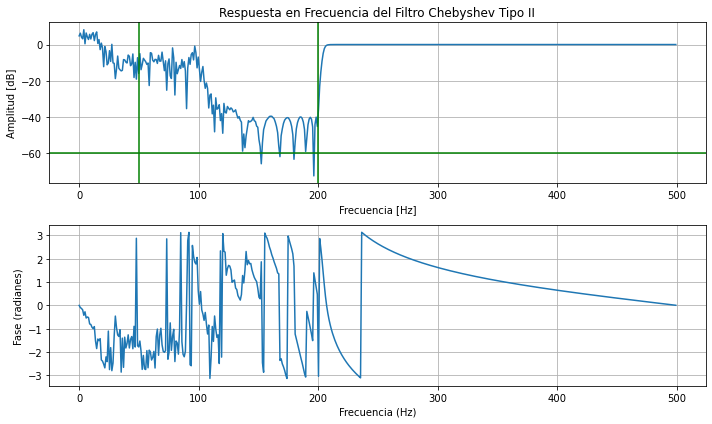

In [60]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

# Especificaciones del filtro
frec_corte_baja = 50  # Frecuencia de corte inferior en Hz
frec_corte_alta = 200  # Frecuencia de corte superior en Hz
orden = 17  # Orden del filtro
ripple_db = 40  # Atenuación en dB en la banda de detención
frec_muestreo = 1000   # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular las frecuencias de corte normalizadas (entre 0 y 1)
frec_corte_baja_normalizada = frec_corte_baja / (0.5 * frec_muestreo)
frec_corte_alta_normalizada = frec_corte_alta / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo II utilizando la función cheby2
#b, a = signal.cheby2(N=orden, rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada], btype='stop', analog=False)
b, a = signal.iirfilter(N=orden,rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada],btype='stop', analog=False, ftype='cheby2')

""" 
Donde:
N: Orden del filtro
rs: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda rechazo. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo II')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(50, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
# de corte inferior del filtro
plt.axvline(200, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte superior del filtro
plt.axhline(-60, color='green') # Agrega una línea horizontal verde en el gráfico para marcar la atenuación 
#en la banda de rechazo (rs)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

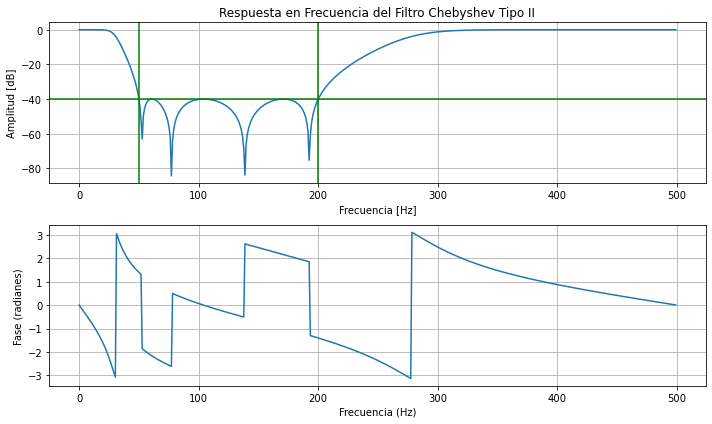

In [48]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

# Especificaciones del filtro
frec_corte_baja = 50  # Frecuencia de corte inferior en Hz
frec_corte_alta = 200  # Frecuencia de corte superior en Hz
orden = 4 # Orden del filtro
ripple_db = 40  # Atenuación en dB en la banda de detención
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular las frecuencias de corte normalizadas (entre 0 y 1)
frec_corte_baja_normalizada = frec_corte_baja / (0.5 * frec_muestreo)
frec_corte_alta_normalizada = frec_corte_alta / (0.5 * frec_muestreo)

# Diseñar el filtro pasa bajas Chebyshev tipo II utilizando la función cheby2
#b, a = signal.cheby2(N=orden, rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada], btype='stop', analog=False)
b, a = signal.iirfilter(N=orden,rs=ripple_db, Wn=[frec_corte_baja_normalizada, frec_corte_alta_normalizada],btype='stop', analog=False, ftype='cheby2')

""" 
Donde:
N: Orden del filtro
rs: Para filtros Chebyshev y elípticos, proporciona la ondulación máxima en la banda rechazo. (dB)
Wn: 
Para los filtros analógicos, Wn es una frecuencia angular (por ejemplo, rad/s).
Para los filtros digitales, Wn está en las mismas unidades que fs. Por defecto, fs es de 2 semiciclos/muestra, 
por lo que se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Wn está, por tanto, en semiciclos/muestra).
analog: Si es True, devuelve un filtro analógico; si no, devuelve un filtro digital.
bytpe:El tipo de filtro: paso-banda, paso-bajo, paso-alto, banda-rechazo.

b,a: Polinomios del numerador (b) y del denominador (a) del filtro IIR.
"""

# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, fs=frec_muestreo)
"""
Donde:
b: Numerador de un filtro lineal.
a: Denominador de un filtro lineal.
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra (por lo que w es de 0 a pi).
NOTA: Cuando se trabaja con filtros digitales, es esencial considerar la frecuencia de muestreo para asegurarse de que la respuesta en frecuencia del filtro 
se evalúe correctamente en el rango adecuado. Si la frecuencia de muestreo es inapropiada, la respuesta en frecuencia podría estar distorsionada o no reflejar 
adecuadamente el comportamiento del filtro.

w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(h))
fase = np.angle(h)
#fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Tipo II')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(50, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
# de corte inferior del filtro
plt.axvline(200, color='green') # Agrega una línea vertical verde en el gráfico para marcar la frecuencia 
#de corte superior del filtro
plt.axhline(-40, color='green') # Agrega una línea horizontal verde en el gráfico para marcar la atenuación 
#en la banda de rechazo (rs)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, fase)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

#### Filtros FIR: Método Ventana

##### Filtro Pasa Bajas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hamming con una longitud de 61 coeficientes, una frecuencia de corte de  100 Hz y una frecuencia de muestreo de  1000 Hz. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

Opción 1:

scipy.signal.firwin2(numtaps, freq, gain, nfreqs=None, window='hamming', nyq=None, antisymmetric=False, fs=None)

El filtro FIR al tener fase lineal viene determinado por el valor de 'numtaps` y la bandera antisimétrica. Hay cuatro combinaciones posibles:

- Tipo I:  numtaps = impar, antisymmetric= False
- Tipo II: numtaps = par, antisymmetric = False
- Tipo III: numtaps = impar, antisymmetric = True
- Tipo IV: numtaps = par , antisymmetric = True

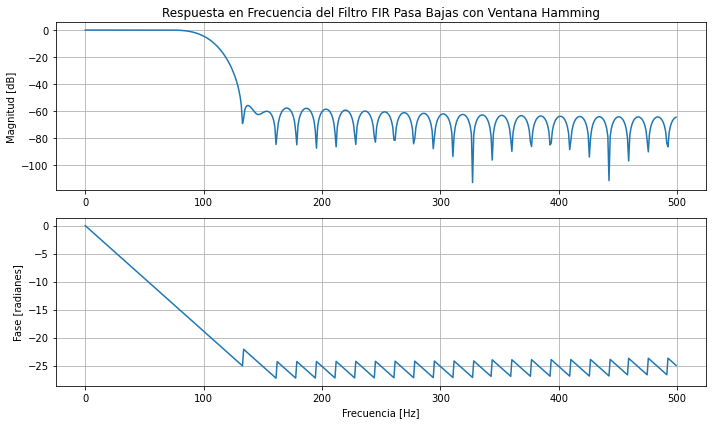

In [36]:
# Especificaciones del filtro
frec_muestreo = 1000  # Frecuencia de muestreo en Hz
frecuencias = [0,100,105,frec_muestreo/2]#[0, frecuencia_de_corte, frecuencia_de_corte + ancho_de_transicion, fs/2]
ganancias = [1, 1, 0, 0]  # Ganancias en las bandas: pasa bajas (1), rechaza banda (0)

numtaps = 61  # Orden del filtro (número de coeficientes)

# Diseñar el filtro FIR pasa altas con ventana de Hamming
filtro_hamming = signal.firwin2(numtaps, frecuencias, ganancias, fs=frec_muestreo, window='hamming', antisymmetric=False)

# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_hamming, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
# Calcula la fase del filtro FIR utilizando "np.angle(h)" y "np.unwrap".
#fase = np.angle(respuesta_frecuencia)
fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bajas con Ventana Hamming')
plt.ylabel('Magnitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

Opción 2:

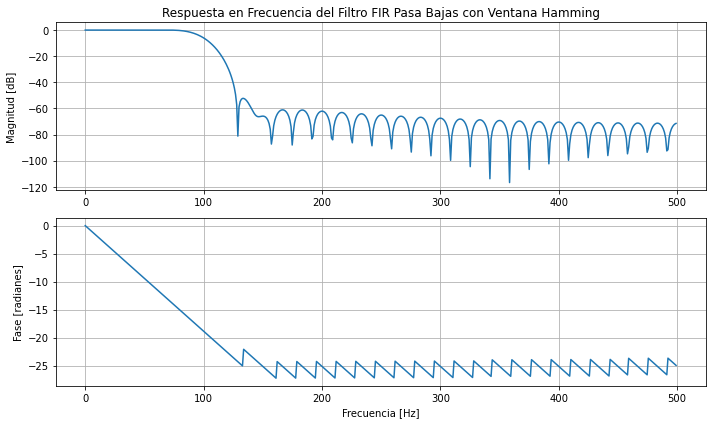

In [37]:
## Filtro Hamming

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
longitud_ventana = 61  # Longitud de la ventana (número de puntos)
frec_muestreo = 1000  # Frecuencia de muestreo (1000 muestras por segundo) 
#Esta frecuenica debe ser mayor al doble de la frecuencia de corte)

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro FIR pasa bajas utilizando la ventana Hamming
filtro_hamming = signal.firwin(longitud_ventana, cutoff=frec_corte_normalizada, window='hamming', pass_zero='lowpass')
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Selección de la vetana de interes: triang, blackman, hamming, hann, bohman, blackmanharris, etc.
pass_zero: Si es True, la ganancia en la frecuencia 0 (es decir, la "ganancia DC") es 1. 
Si es False, la ganancia DC es 0. También puede ser un argumento de cadena para el tipo de filtro deseado 
(equivalente a btype en las funciones de diseño IIR: {bandpass, lowpass, highpass, bandstop}), optional.
"""
# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_hamming, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
# Calcula la fase del filtro FIR utilizando "np.angle(h)" y "np.unwrap".
#fase = np.angle(respuesta_frecuencia)
fase = np.unwrap(np.angle(h)) #versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bajas con Ventana Hamming')
plt.ylabel('Magnitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hann con una longitud de 61 coeficientes, una frecuencia de corte de 100 Hz y una frecuencia de muestreo de 1000 Hz. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

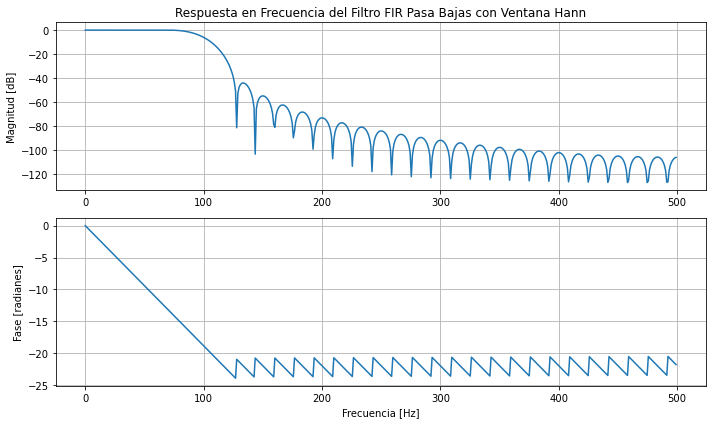

In [58]:

# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
longitud_ventana = 61  # Longitud de la ventana (número de puntos)

# Frecuencia de muestreo (debe ser mayor al doble de la frecuencia de corte)
frec_muestreo = 1000  # Por ejemplo, 1000 Hz

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro FIR pasa bajas utilizando la ventana Hamming
filtro_hann = signal.firwin(longitud_ventana, cutoff=frec_corte_normalizada, window='hann',pass_zero = 'lowpass')
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Selección de la vetana de interes: triang, blackman, hamming, hann, bohman, blackmanharris, etc.
pass_zero: Si es True, la ganancia en la frecuencia 0 (es decir, la "ganancia DC") es 1. 
Si es False, la ganancia DC es 0. También puede ser un argumento de cadena para el tipo de filtro deseado 
(equivalente a btype en las funciones de diseño IIR: {bandpass, lowpass, highpass, bandstop}), optional.
"""
# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_hann, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
# Calcula la fase del filtro FIR utilizando "np.angle(h)" y "np.unwrap".
#fase = np.angle(respuesta_frecuencia)
fase = np.unwrap(np.angle(respuesta_frecuencia))#versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bajas con Ventana Hann')
plt.ylabel('Magnitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

##### Filtro Pasa Altas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana de Hanning con una longitud de 101 coeficientes, una frecuencia de corte de 100 Hz y una frecuencia de muestreo de  1000 Hz. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

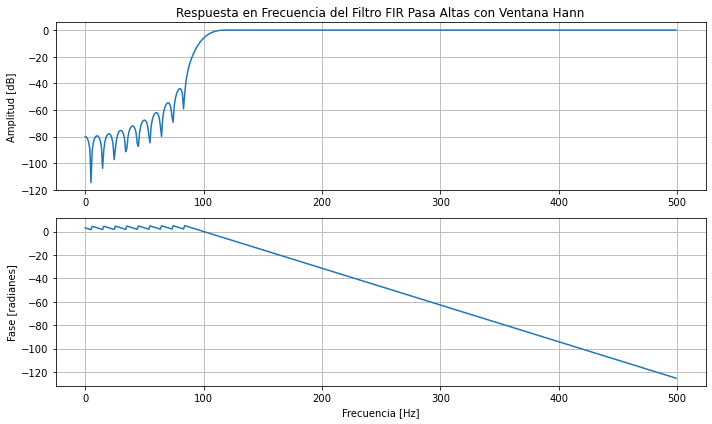

In [54]:
# Especificaciones del filtro
frec_corte = 100  # Frecuencia de corte en Hz
longitud_ventana = 101  # Longitud de la ventana (número de puntos)

# Frecuencia de muestreo (debe ser mayor al doble de la frecuencia de corte)
frec_muestreo = 1000  # Por ejemplo, 1000 Hz

# Calcular la frecuencia de corte normalizada (entre 0 y 1)
frec_corte_normalizada = frec_corte / (0.5 * frec_muestreo)

# Diseñar el filtro FIR pasa altas utilizando la ventana Hamming
filtro_hanning = signal.firwin(longitud_ventana, cutoff=frec_corte_normalizada, window='hann',pass_zero='highpass')
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Selección de la vetana de interes: triang, blackman, hamming, hann, bohman, blackmanharris, etc.
pass_zero: Si es True, la ganancia en la frecuencia 0 (es decir, la "ganancia DC") es 1. 
Si es False, la ganancia DC es 0. También puede ser un argumento de cadena para el tipo de filtro deseado 
(equivalente a btype en las funciones de diseño IIR: {bandpass, lowpass, highpass, bandstop}), optional.
"""
# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_hanning, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
# Calcula la fase en radianes
fase = np.unwrap(np.angle(respuesta_frecuencia))#versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Altas con Ventana Hann')
plt.ylabel('Amplitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

##### Filtro Pasa Bandas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana Blackman-Harris con una longitud de 1001 coeficientes, una frecuencia de muestreo de  1000 Hz y dos frecuencias de corte: 100 Hz y 200 Hz. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

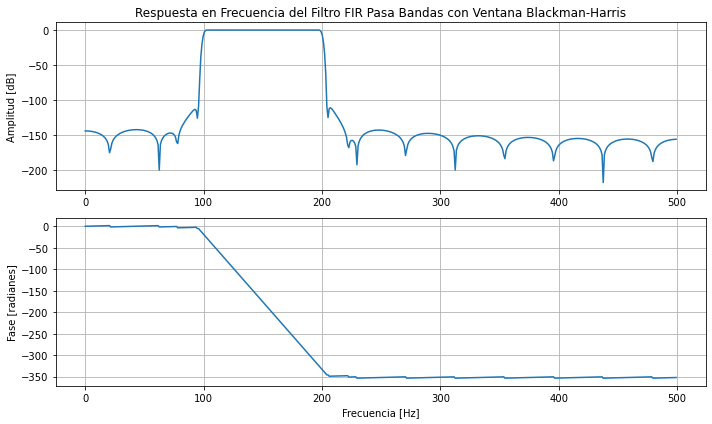

In [113]:
# Especificaciones del filtro pasa bandas
frec_corte_baja = 100  # Frecuencia de corte inferior en Hz
frec_corte_alta = 200  # Frecuencia de corte superior en Hz
longitud_ventana = 1001  # Longitud de la ventana (número de puntos)

# Frecuencia de muestreo (debe ser mayor al doble de la frecuencia de corte alta)
frec_muestreo = 1000  # Por ejemplo, 1000 Hz

# Calcular las frecuencias de corte normalizadas (entre 0 y 1)
frec_corte_baja_normalizada = frec_corte_baja / (0.5 * frec_muestreo)
frec_corte_alta_normalizada = frec_corte_alta / (0.5 * frec_muestreo)

# Diseñar el filtro FIR pasa bandas utilizando la ventana de Blackman-Harris
filtro_blackmanharris = signal.firwin(longitud_ventana,cutoff= [frec_corte_baja_normalizada, frec_corte_alta_normalizada],
                                      window='blackmanharris', pass_zero=False)
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Selección de la vetana de interes: triang, blackman, hamming, hann, bohman, blackmanharris, etc.
pass_zero: 
Si es False, Indica que el filtro es un filtro de paso-banda, es decir, permite el paso de 
frecuencias dentro del rango especificado.
También puede ser un argumento de cadena para el tipo de filtro deseado 
(equivalente a btype en las funciones de diseño IIR: {bandpass, lowpass, highpass, bandstop}), optional.
"""
# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_blackmanharris, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
#fase = np.angle(respuesta_frecuencia)
fase = np.unwrap(np.angle(respuesta_frecuencia))#versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Bandas con Ventana Blackman-Harris')
plt.ylabel('Amplitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

##### Filtro Rechaza Bandas

El código implementa el diseño de un filtro FIR (Finite Impulse Response) utilizando la técnica de ventana Blackman-Harris con una longitud de 1001 coeficientes y dos frecuencias de corte: 100 Hz y 200 Hz. Luego, calcula y grafica la respuesta en frecuencia y la fase del filtro.

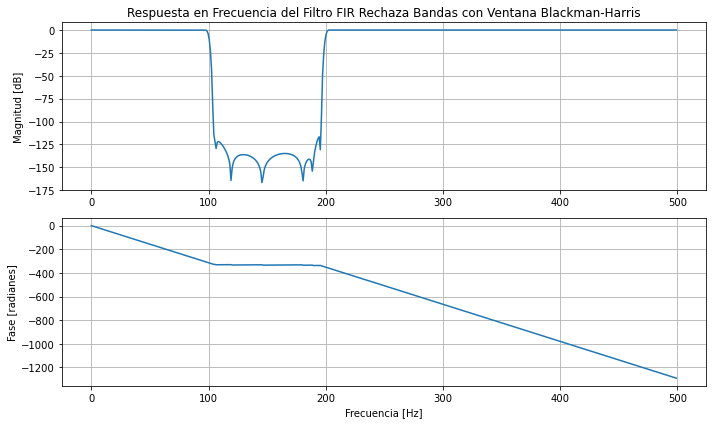

In [123]:
# Especificaciones del filtro rechaza bandas
frec_corte_baja = 100  # Frecuencia de corte inferior en Hz
frec_corte_alta = 200  # Frecuencia de corte superior en Hz
longitud_ventana = 1001  # Longitud de la ventana (número de puntos)

# Frecuencia de muestreo (debe ser mayor al doble de la frecuencia de corte alta)
frec_muestreo = 1000  # Por ejemplo, 1000 Hz

# Calcular las frecuencias de corte normalizadas (entre 0 y 1)
frec_corte_baja_normalizada = frec_corte_baja / (0.5 * frec_muestreo)
frec_corte_alta_normalizada = frec_corte_alta / (0.5 * frec_muestreo)

# Diseñar el filtro FIR rechaza bandas utilizando la ventana de Blackman-Harris
filtro_blackmanharris = signal.firwin(longitud_ventana, [frec_corte_baja_normalizada, frec_corte_alta_normalizada],
                                      window='blackmanharris', pass_zero=True)
"""
Donde:
n: Cantidad de coeficientes que se utilizarán para implementar el filtro
cutoff: Especifica las dos frecuencias de corte normalizadas del filtro. La frecuencia de corte se expresa 
como una fracción de la frecuencia de muestreo (fs), donde cutoff=1.0 corresponde a la mitad de la frecuencia 
de muestreo (fs/2).
window: Selección de la vetana de interes: triang, blackman, hamming, hann, bohman, blackmanharris, etc.
pass_zero: 
Si es True, Indica que el filtro es un filtro rechaza banda, es decir, no permite el paso de frecuencias dentro 
del rango especificado.
También puede ser un argumento de cadena para el tipo de filtro deseado 
(equivalente a btype en las funciones de diseño IIR: {bandpass, lowpass, highpass, bandstop}), optional.

"""
# Calcular la respuesta en frecuencia del filtro
frecuencia, respuesta_frecuencia = signal.freqz(filtro_blackmanharris, fs=frec_muestreo)
"""
Donde:
fs: La frecuencia de muestreo del sistema digital. Por defecto es 2*pi radianes/muestra 
(por lo que w es de 0 a pi).
w:  Vector que contiene las frecuencias normalizadas al rango [0,pi) (en radianes/muestra) para las cuales se evalúa la respuesta en frecuencia del filtro.
h: La respuesta en frecuencia. Vector complejo. Contiene información sobre la ganancia y la fase del filtro para diferentes frecuencias.
"""
# Calcular la magnitud en dB y la fase de la respuesta en frecuencia
magnitud_dB = 20 * np.log10(np.abs(respuesta_frecuencia))
#fase = np.angle(respuesta_frecuencia)
fase = np.unwrap(np.angle(respuesta_frecuencia))#versión suavizada de la fase que permite una representación más coherente y continua, evita los saltos abruptos

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencia, magnitud_dB)
plt.title('Respuesta en Frecuencia del Filtro FIR Rechaza Bandas con Ventana Blackman-Harris')
plt.ylabel('Magnitud [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frecuencia, fase)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid()

plt.tight_layout()
plt.show()

##